# Imports

In [ ]:
import os
import io
import math

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import requests

# Data

In [ ]:
data = requests.get("https://www.statlearning.com/s/College.csv")
dt = pd.read_csv(io.StringIO(data.text))

In [ ]:
dt.columns = dt.columns.str.replace('.', '', regex=False)

In [ ]:
dt.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
dt.shape

(777, 19)

# Elite

Create a new variable in your data frame named “Elite”, which takes the value of “Yes” if over 50% of
the schools new students come from the top 10% of their high school class, and “No” if not. (Consider
the variable Top10perc to do this.)

In [ ]:
dt['Elite'] = np.where(dt['Top10perc'] > 50, 'Yes', 'No')

In [ ]:
dt

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate,Elite
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,No
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,No
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,No
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,No
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,No
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,No
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,Yes


In [ ]:
dt.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'FUndergrad', 'PUndergrad', 'Outstate', 'RoomBoard',
       'Books', 'Personal', 'PhD', 'Terminal', 'SFRatio', 'percalumni',
       'Expend', 'GradRate', 'Elite'],
      dtype='object')

# Exploratory Analysis

We will be considering how the graduation rate (GradRate) is affected by a number of variables, such
as Enroll, Outstate SFRatio and Expend. Add a section in your writeup for “Exploratory Analysis”,
where you consider these variables and summarize them, both numerically and graphically, with the
appropriate methods. Make sure to look for multicollinearity in this section.

In [ ]:
model = smf.ols(formula='GradRate ~ Enroll + Outstate + SFRatio + Expend', data=dt)
results = model.fit()

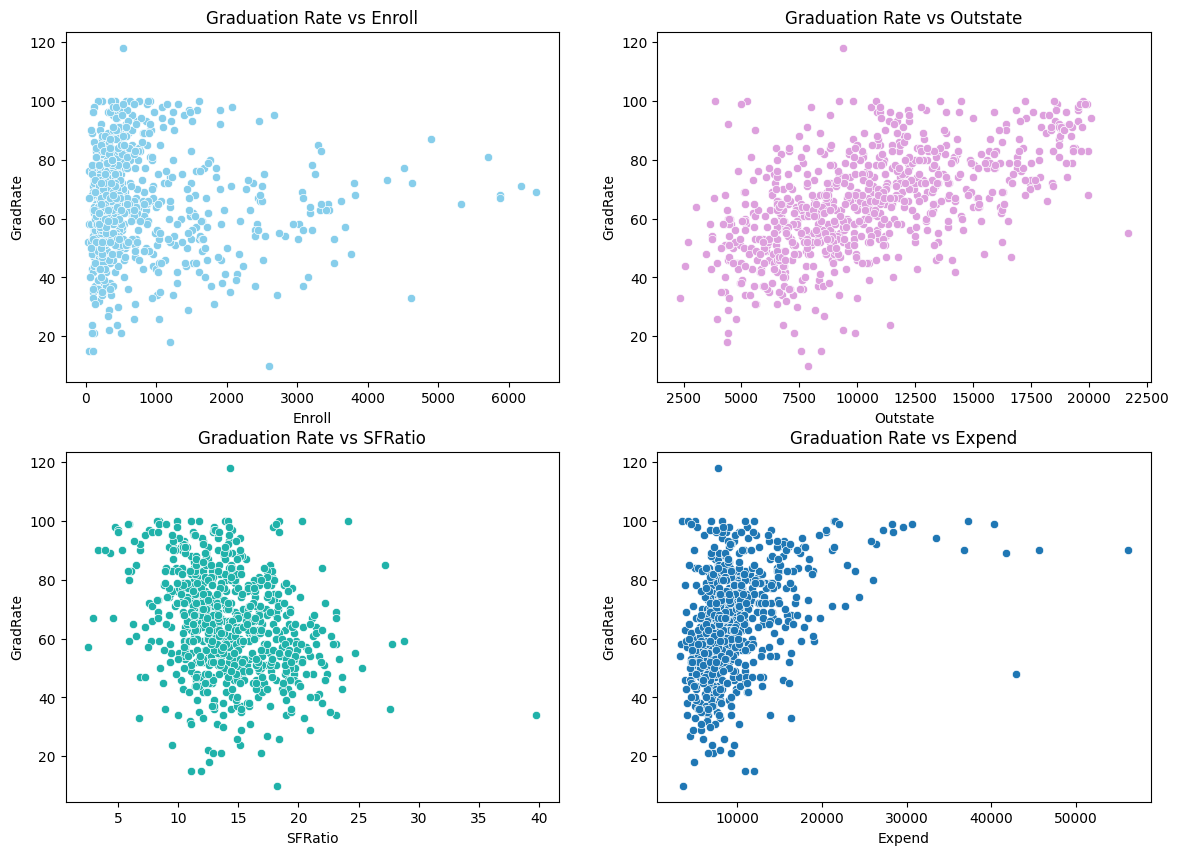

In [ ]:
plt.figure(figsize=(14, 10))
plt.tight_layout()

plt.subplot(2, 2, 1)
sns.scatterplot(data=dt, x='Enroll', y='GradRate', color='skyblue')
plt.title('Graduation Rate vs Enroll')

plt.subplot(2, 2, 2)
sns.scatterplot(data=dt, x='Outstate', y='GradRate', color='plum')
plt.title('Graduation Rate vs Outstate')

plt.subplot(2, 2, 3)
sns.scatterplot(data=dt, x='SFRatio', y='GradRate', color='lightseagreen')
plt.title('Graduation Rate vs SFRatio')

plt.subplot(2, 2, 4)
sns.scatterplot(data=dt, x='Expend', y='GradRate')
plt.title('Graduation Rate vs Expend')

plt.show()

In [ ]:
dt['Enroll'].describe()

,Enroll
count,777.000000
mean,779.972973
std,929.176190
min,35.000000
25%,242.000000
50%,434.000000
75%,902.000000
max,6392.000000


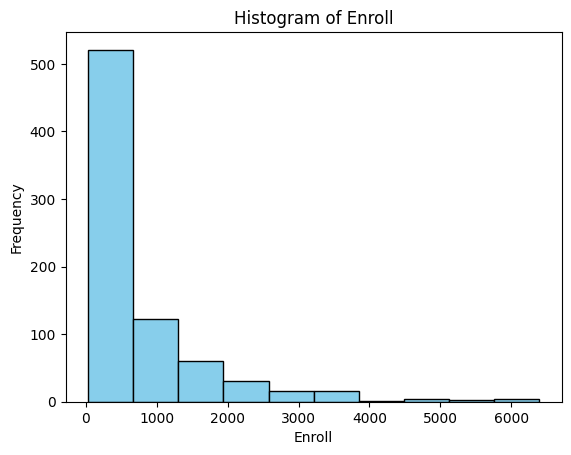

In [ ]:
plt.hist(dt['Enroll'], bins=10, color = 'skyblue', edgecolor='black')
plt.title('Histogram of Enroll')
plt.xlabel('Enroll')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dt['Outstate'].describe()

,Outstate
count,777.000000
mean,10440.669241
std,4023.016484
min,2340.000000
25%,7320.000000
50%,9990.000000
75%,12925.000000
max,21700.000000


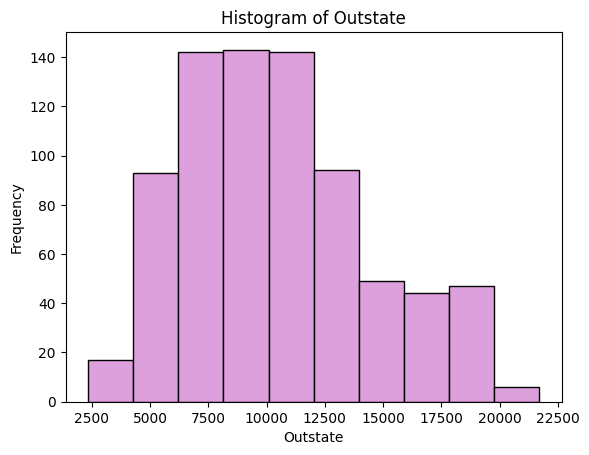

In [ ]:
plt.hist(dt['Outstate'], bins=10, color = 'plum', edgecolor='black')
plt.title('Histogram of Outstate')
plt.xlabel('Outstate')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dt['SFRatio'].describe()

,SFRatio
count,777.000000
mean,14.089704
std,3.958349
min,2.500000
25%,11.500000
50%,13.600000
75%,16.500000
max,39.800000


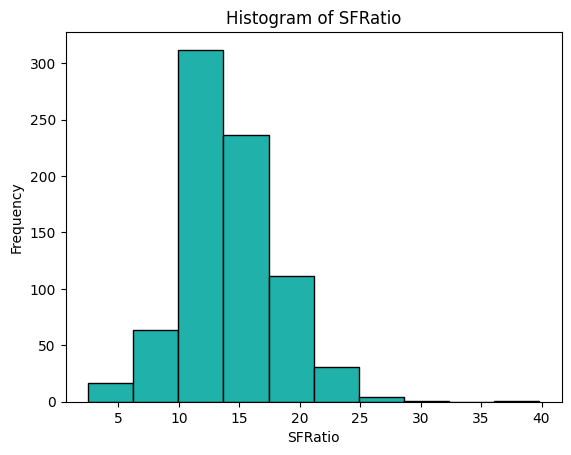

In [ ]:
plt.hist(dt['SFRatio'], bins=10, color = 'lightseagreen', edgecolor='black')
plt.title('Histogram of SFRatio')
plt.xlabel('SFRatio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
dt['Expend'].describe()

,Expend
count,777.000000
mean,9660.171171
std,5221.768440
min,3186.000000
25%,6751.000000
50%,8377.000000
75%,10830.000000
max,56233.000000


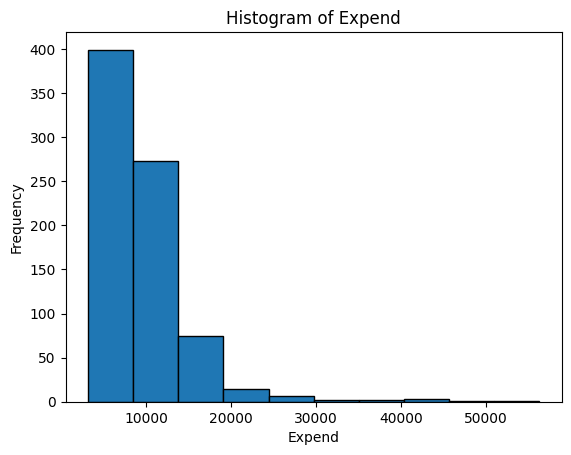

In [ ]:
plt.hist(dt['Expend'], bins=10, edgecolor='black')
plt.title('Histogram of Expend')
plt.xlabel('Expend')
plt.ylabel('Frequency')
plt.show()

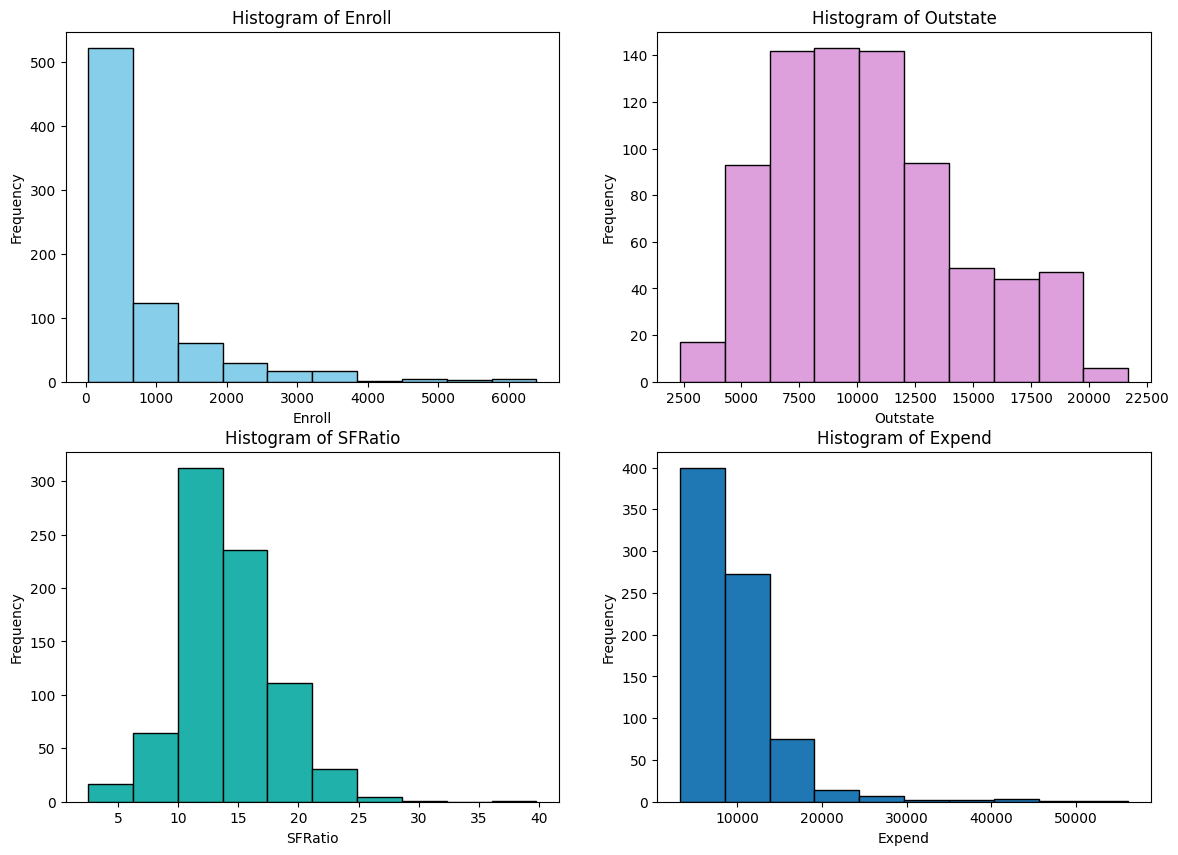

In [ ]:
plt.figure(figsize=(14, 10))
plt.tight_layout()

plt.subplot(2,2,1)
plt.hist(dt['Enroll'], bins=10, color = 'skyblue', edgecolor='black')
plt.title('Histogram of Enroll')
plt.xlabel('Enroll')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(dt['Outstate'], bins=10, color = 'plum', edgecolor='black')
plt.title('Histogram of Outstate')
plt.xlabel('Outstate')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(dt['SFRatio'], bins=10, color = 'lightseagreen', edgecolor='black')
plt.title('Histogram of SFRatio')
plt.xlabel('SFRatio')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(dt['Expend'], bins=10, edgecolor='black')
plt.title('Histogram of Expend')
plt.xlabel('Expend')
plt.ylabel('Frequency')

plt.show()

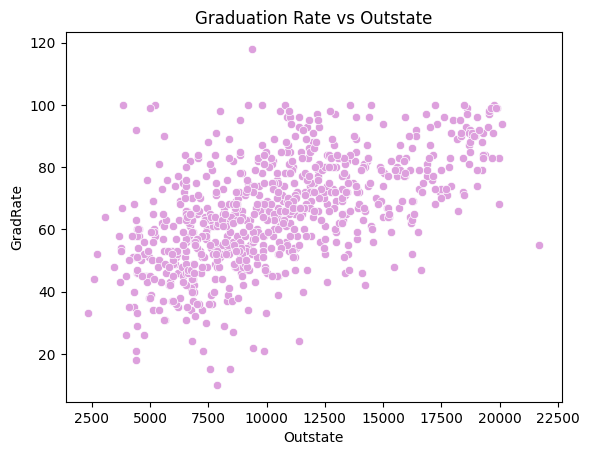

In [ ]:
sns.scatterplot(data=dt, x='Outstate', y='GradRate', color='plum')
plt.title('Graduation Rate vs Outstate')
plt.show()

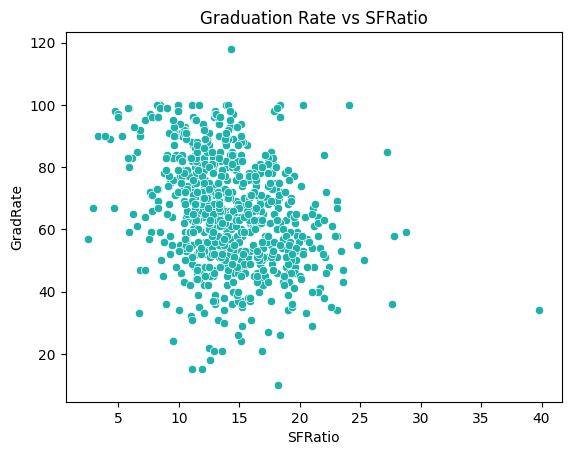

In [ ]:
sns.scatterplot(data=dt, x='SFRatio', y='GradRate', color='lightseagreen')
plt.title('Graduation Rate vs SFRatio')
plt.show()

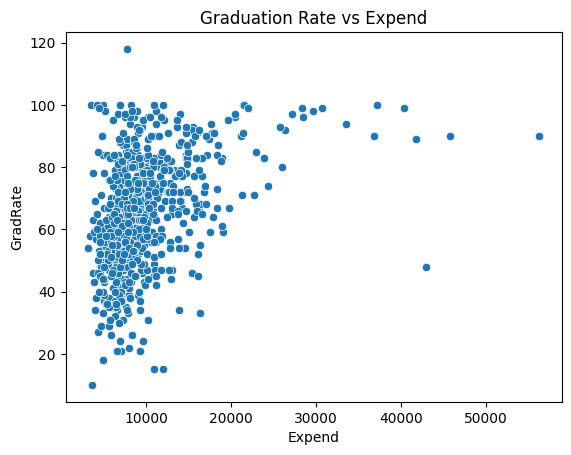

In [ ]:
sns.scatterplot(data=dt, x='Expend', y='GradRate')
plt.title('Graduation Rate vs Expend')
plt.show()

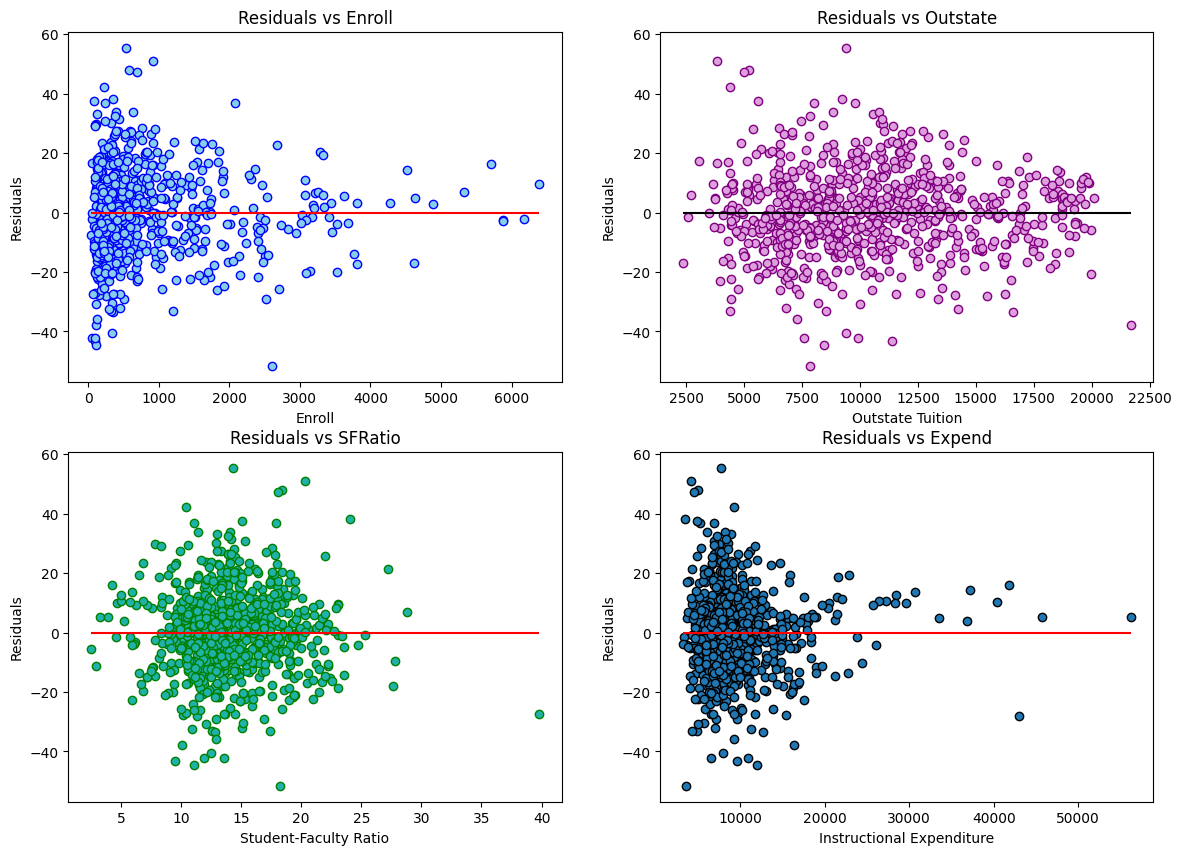

In [ ]:
plt.figure(figsize=(14, 10))
plt.tight_layout()

# Enroll
plt.subplot(2, 2, 1)
plt.scatter(dt['Enroll'], results.resid, color='skyblue', edgecolor='blue')
plt.hlines(y=0, xmin=dt['Enroll'].min(), xmax=dt['Enroll'].max(), color='red', linestyle='-')
plt.title('Residuals vs Enroll')
plt.xlabel('Enroll')
plt.ylabel('Residuals')

# Outstate
plt.subplot(2, 2, 2)
plt.scatter(dt['Outstate'], results.resid, color='plum', edgecolor='purple')
plt.hlines(y=0, xmin=dt['Outstate'].min(), xmax=dt['Outstate'].max(), color='black', linestyle='-')
plt.title('Residuals vs Outstate')
plt.xlabel('Outstate Tuition')
plt.ylabel('Residuals')

# SFRatio
plt.subplot(2, 2, 3)
plt.scatter(dt['SFRatio'], results.resid, color='lightseagreen', edgecolor='green')
plt.hlines(y=0, xmin=dt['SFRatio'].min(), xmax=dt['SFRatio'].max(), color='red', linestyle='-')
plt.title('Residuals vs SFRatio')
plt.xlabel('Student-Faculty Ratio')
plt.ylabel('Residuals')

#Expend
plt.subplot(2, 2, 4)
plt.scatter(dt['Expend'], results.resid, edgecolor='black')
plt.hlines(y=0, xmin=dt['Expend'].min(), xmax=dt['Expend'].max(), color='red', linestyle='-')
plt.title('Residuals vs Expend')
plt.xlabel('Instructional Expenditure')
plt.ylabel('Residuals')

plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X = dt[['Enroll', 'Outstate', 'SFRatio', 'Expend']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

   Variable        VIF
0     const  49.752030
1    Enroll   1.179941
2  Outstate   2.049040
3   SFRatio   1.783476
4    Expend   2.301899


# Simple Linear Regression

Next, have a section for “Simple Linear Regression”, where you create a model for GradRate on each of the four explanatory variables mentioned in Question #2 alone. Report your results and let me know what you notice, and what this tells about the variables.

In [ ]:
model1 = smf.ols(formula='GradRate ~ Enroll', data=dt)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               GradRate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3870
Date:                Sat, 19 Apr 2025   Prob (F-statistic):              0.534
Time:                        03:29:27   Log-Likelihood:                -3311.3
No. Observations:                 777   AIC:                             6627.
Df Residuals:                     775   BIC:                             6636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.7855      0.805     81.709      0.0

In [ ]:
model2 = smf.ols(formula='GradRate ~ Outstate', data=dt)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               GradRate   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     375.5
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.63e-68
Time:                        03:29:27   Log-Likelihood:                -3158.0
No. Observations:                 777   AIC:                             6320.
Df Residuals:                     775   BIC:                             6329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9951      1.408     28.398      0.0

In [ ]:
model3 = smf.ols(formula='GradRate ~ SFRatio', data=dt)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:               GradRate   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     80.48
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.18e-18
Time:                        03:29:27   Log-Likelihood:                -3273.1
No. Observations:                 777   AIC:                             6550.
Df Residuals:                     775   BIC:                             6560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.2168      2.171     38.786      0.0

In [ ]:
model4 = smf.ols(formula='GradRate ~ Expend', data=dt)
results4= model4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:               GradRate   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     139.3
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           1.10e-29
Time:                        03:29:27   Log-Likelihood:                -3247.3
No. Observations:                 777   AIC:                             6499.
Df Residuals:                     775   BIC:                             6508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.0588      1.194     44.419      0.0

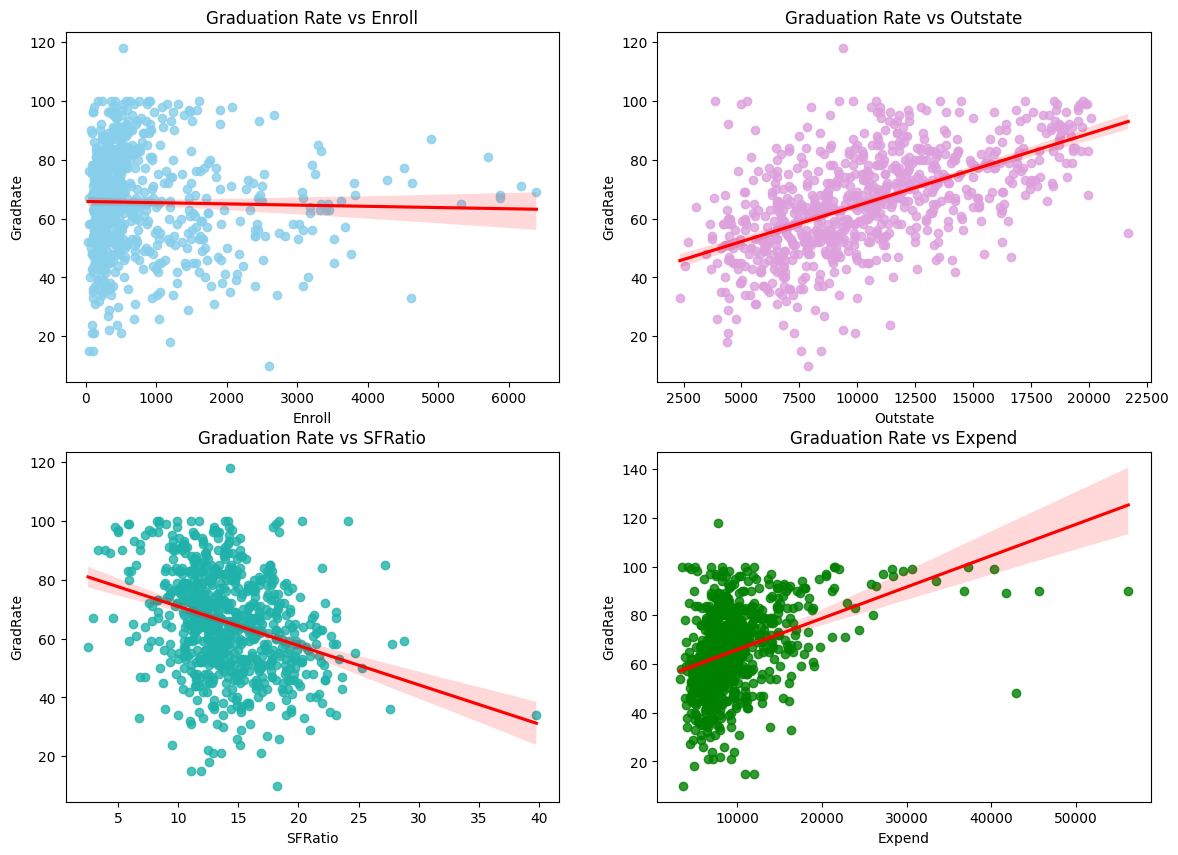

In [ ]:
plt.figure(figsize=(14, 10))
plt.tight_layout()

plt.subplot(2, 2, 1)
sns.regplot(data=dt, x='Enroll', y='GradRate', color='skyblue', line_kws={'color':'red'})
plt.title('Graduation Rate vs Enroll')

plt.subplot(2, 2, 2)
sns.regplot(data=dt, x='Outstate', y='GradRate', color='plum', line_kws={'color':'red'})
plt.title('Graduation Rate vs Outstate')

plt.subplot(2, 2, 3)
sns.regplot(data=dt, x='SFRatio', y='GradRate', color='lightseagreen', line_kws={'color':'red'})
plt.title('Graduation Rate vs SFRatio')

plt.subplot(2, 2, 4)
sns.regplot(data=dt, x='Expend', y='GradRate', color='green', line_kws={'color':'red'})
plt.title('Graduation Rate vs Expend')

plt.show()



# Multiple Linear Regression

Have a section for “Multiple Linear Regression”, where you fit a model of GradRate against all four variables together. Report your results, including the regression equation and all relevant information. Is this model a good fit for the data? Report on that using the various metrics and tests we’ve discussed in class.
Are any of the coefficients not significant? If so, run a model where you remove them and keep only the significant variables. What, if anything, changes?

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     95.48
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           5.39e-66
Time:                        03:29:31   Log-Likelihood:                -3155.4
No. Observations:                 777   AIC:                             6321.
Df Residuals:                     772   BIC:                             6344.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.8918      3.565     10.911      0.000      31.894      45.889
Enroll         0.0013      0.001      2.221      0.027       0.000       0.002
Outstate       0.0025      0.000     13.962      0.000       0.002       0.003
SFRatio       -0.0197      0.171     -0.116      0.908      -0.355       0.315
Expend     -4.179e-05      0.000     -0.284      0.776      -0.000       0.000
==============================================================================
Omnibus:                       17.507   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.456
Skew:                           0.094   Prob(JB):                     8.96e-08
Kurtosis:                       3.983   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_2 = smf.ols('GradRate ~ Enroll + Outstate', data=dt)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.92e-68
Time:                        03:29:31   Log-Likelihood:                -3155.4
No. Observations:                 777   AIC:                             6317.
Df Residuals:                     774   BIC:                             6331.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.5405      1.542     25.000      0.000      35.514      41.567
Enroll         0.0013      0.001      2.289      0.022       0.000       0.002
Outstate       0.0025      0.000     19.550      0.000       0.002       0.003
==============================================================================
Omnibus:                       17.575   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.610
Skew:                           0.095   Prob(JB):                     8.29e-08
Kurtosis:                       3.985   Cond. No.                     3.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
dt['log_Enroll'] = np.log(dt['Enroll'])

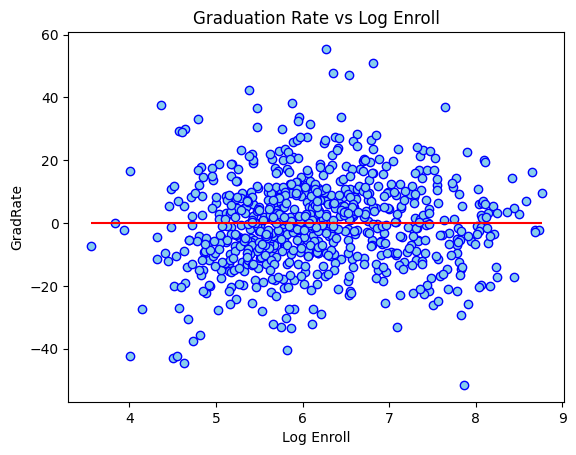

In [ ]:
plt.scatter(dt['log_Enroll'], results.resid, color = 'skyblue', edgecolors='blue')
plt.hlines(y=0, xmin=dt['log_Enroll'].min(), xmax=dt['log_Enroll'].max(), color='red', linestyle='-')
plt.title('Graduation Rate vs Log Enroll')
plt.xlabel('Log Enroll')
plt.ylabel('GradRate')
plt.show()

In [ ]:
model_3 = smf.ols('GradRate ~ log_Enroll + Outstate', data=dt)
results_3 = model_3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GradRate   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     198.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.02e-70
Time:                        03:29:31   Log-Likelihood:                -3150.4
No. Observations:                 777   AIC:                             6307.
Df Residuals:                     774   BIC:                             6321.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.7453      3.662      7.304      0.000      19.557      33.934
log_Enroll     2.0688      0.529      3.914      0.000       1.031       3.107
Outstate       0.0025      0.000     19.836      0.000       0.002       0.003
==============================================================================
Omnibus:                       17.814   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.763
Skew:                           0.125   Prob(JB):                     1.27e-07
Kurtosis:                       3.959   Cond. No.                     8.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Graduate Rate

Suppose a relative of mine is looking at a college with 1,000 new student enrolled, an out-state tuition of 11,000, a student-to-faculty ratio of 12 and an instructional expenditure per student of $9,200. What would you predict the graduation rate of that school to be? What are the confidence and prediction intervals?

In [ ]:
task = pd.DataFrame({
    'Enroll': [1000],
    'Outstate': [11000],
    'SFRatio': [12],
    'Expend': [9200]
})

In [ ]:
prediction = results.get_prediction(task)
summaries = prediction.summary_frame(alpha=0.05)

In [ ]:
task2 = pd.DataFrame({
    'Enroll': [1000],
    'Outstate': [11000]
})

In [ ]:
prediction2 = results_2.get_prediction(task2)
summaries2 = prediction2.summary_frame(alpha=0.05)

In [ ]:
dt[dt['Enroll'] == 1000]['log_Enroll']

,log_Enroll
518,6.907755


In [ ]:
task3 = pd.DataFrame({
    'log_Enroll': [6.907755],
    'Outstate': [11000]
})

In [ ]:
prediction3 = results_3.get_prediction(task3)
summaries3 = prediction3.summary_frame(alpha=0.05)

In [ ]:
print("Predicted Mean")
print(summaries.iloc[:,0])

print("Standard Error of Predicted Mean:\n")
print(summaries.iloc[:,1])

print("\nConfidence Intervals for the Mean:\n")
print(summaries.iloc[:,2:4])

print("\nPrediction Intervals for an Individual Response:\n")
print(summaries.iloc[:,4:6])

Predicted Mean
0    67.217871
Name: mean, dtype: float64
Standard Error of Predicted Mean:

0    0.681262
Name: mean_se, dtype: float64

Confidence Intervals for the Mean:

   mean_ci_lower  mean_ci_upper
0      65.880526      68.555217

Prediction Intervals for an Individual Response:

   obs_ci_lower  obs_ci_upper
0     39.532743        94.903


In [ ]:
print("Predicted Mean")
print(summaries2.iloc[:,0])

print("Standard Error of Predicted Mean:\n")
print(summaries2.iloc[:,1])

print("\nConfidence Intervals for the Mean:\n")
print(summaries2.iloc[:,2:4])

print("\nPrediction Intervals for an Individual Response:\n")
print(summaries2.iloc[:,4:6])

Predicted Mean
0    67.130131
Name: mean, dtype: float64
Standard Error of Predicted Mean:

0    0.526441
Name: mean_se, dtype: float64

Confidence Intervals for the Mean:

   mean_ci_lower  mean_ci_upper
0       66.09671      68.163553

Prediction Intervals for an Individual Response:

   obs_ci_lower  obs_ci_upper
0     39.492409     94.767853


In [ ]:
print("Predicted Mean")
print(summaries3.iloc[:,0])

print("Standard Error of Predicted Mean:\n")
print(summaries3.iloc[:,1])

print("\nConfidence Intervals for the Mean:\n")
print(summaries3.iloc[:,2:4])

print("\nPrediction Intervals for an Individual Response:\n")
print(summaries3.iloc[:,4:6])

Predicted Mean
0    68.373387
Name: mean, dtype: float64
Standard Error of Predicted Mean:

0    0.642143
Name: mean_se, dtype: float64

Confidence Intervals for the Mean:

   mean_ci_lower  mean_ci_upper
0      67.112839      69.633936

Prediction Intervals for an Individual Response:

   obs_ci_lower  obs_ci_upper
0      40.90293     95.843845


In [ ]:
task4 = pd.DataFrame({
    'Outstate': [11000]
})

In [ ]:
prediction4 = results2.get_prediction(task4)
summaries4 = prediction4.summary_frame(alpha=0.05)

In [ ]:
print("Predicted Mean")
print(summaries4.iloc[:,0])

print("Standard Error of Predicted Mean:\n")
print(summaries4.iloc[:,1])

print("\nConfidence Intervals for the Mean:\n")
print(summaries4.iloc[:,2:4])

print("\nPrediction Intervals for an Individual Response:\n")
print(summaries4.iloc[:,4:6])

Predicted Mean
0    66.827711
Name: mean, dtype: float64
Standard Error of Predicted Mean:

0    0.510984
Name: mean_se, dtype: float64

Confidence Intervals for the Mean:

   mean_ci_lower  mean_ci_upper
0      65.824634      67.830788

Prediction Intervals for an Individual Response:

   obs_ci_lower  obs_ci_upper
0     39.115777     94.539645
